# Clase 3 - Semana 2
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

## Programación orientada a arrays

Supongamos que queremos definir un área de dos dimensiones formada por los puntos de coordenadas $x = 0, 1, 2$ y $y = 0, 1,2$

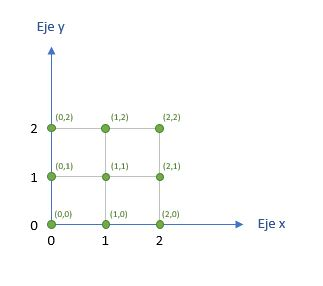

El objetivo es obtener dos arrays, cada uno de tamaño (3, 3) en los que se incluyan las coordenadas x e y (por separado) de los 9 puntos en cuestión. Esto es exactamente lo que hace la función **meshgrid:** acepta como entrada las coordenadas que definen el segmento del hiperplano (puede tratarse de dos dimensiones o de cualquier otro número de ellas) y devuelve arrays con las coordenadas de dichos puntos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cordx = [0,1,2]
cordy = [0,1,2]

x , y = np.meshgrid(cordx,cordy)

In [4]:
x

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [5]:
y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

Supongamos que queremos evaluar la función


$$
f(x,y)=\cos{(x^2+y^2)}
$$

 a lo largo de una cuadrícula de valores.

In [139]:
points = np.arange(0, 10, 10/200) # 20 puntos espaciados por igual

In [140]:
x, y = np.meshgrid(points, points)

In [141]:
z = np.cos(x ** 2 + y ** 2)

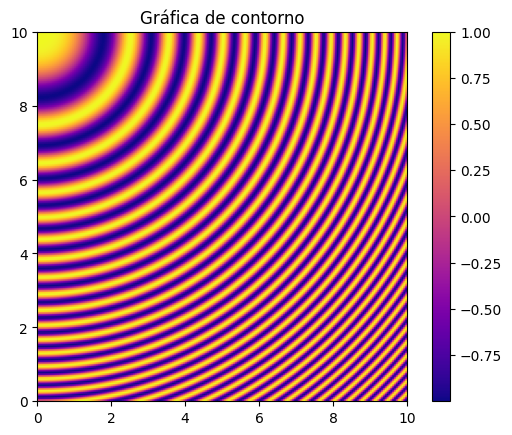

In [142]:
plt.imshow(z, cmap='plasma', extent=[0, 10, 0, 10])
plt.colorbar()
plt.title('Gráfica de contorno')
plt.show()

Más colores: https://matplotlib-org.translate.goog/stable/users/explain/colors/colormaps.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc

Considera la función
$$
f(x,y) \;=\; 
\begin{cases}
\dfrac{\sin(x^2+y^2)}{x^2+y^2}, & x^2+y^2>1,\\[1em]
\dfrac{1}{2}, & x^2+y^2\leq 1.
\end{cases}
$$

Grafica la superficie de valores de $f(x,y)$ en el cuadrado $[-4,4]\times[-4,4]$.


In [22]:
points = np.arange(-4, 4, 8/200)

In [23]:
x, y = np.meshgrid(points, points)

In [24]:
r = x**2 + y**2

In [25]:
z = np.sin(r)/r

In [27]:
z[r<=1]=1/2

In [28]:
z

array([[ 0.01723208,  0.00828743, -0.00157832, ..., -0.01138977,
        -0.00157832,  0.00828743],
       [ 0.00828743, -0.00168038, -0.01158469, ..., -0.02045601,
        -0.01158469, -0.00168038],
       [-0.00157832, -0.01158469, -0.020539  , ..., -0.02757416,
        -0.020539  , -0.01158469],
       ...,
       [-0.01138977, -0.02045601, -0.02757416, ..., -0.03206505,
        -0.02757416, -0.02045601],
       [-0.00157832, -0.01158469, -0.020539  , ..., -0.02757416,
        -0.020539  , -0.01158469],
       [ 0.00828743, -0.00168038, -0.01158469, ..., -0.02045601,
        -0.01158469, -0.00168038]])

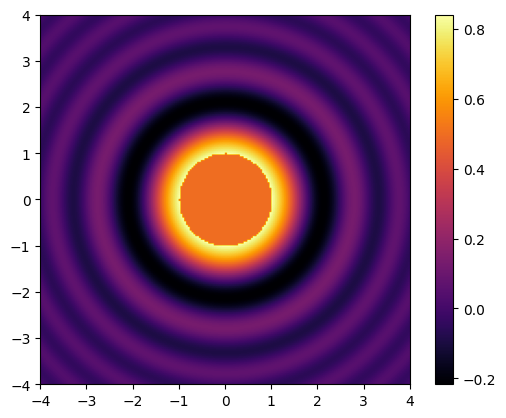

In [30]:
plt.imshow(z, extent=[-4,4,-4,4],  cmap='inferno')
plt.colorbar()

### Métodos estadísticos 

Los números aleatorios no lo son realmente (son más bien pseudoaleatorios); en realidad los produce un generador de números aleatorios configurable, que determina de forma preestablecida qué valores se crean. 

In [43]:
rng = np.random.default_rng(seed=123) #El argumento seed determina 
                                    #el estado inicial del generador
arr = rng.standard_normal((5, 4))

In [44]:
arr

array([[-0.98912135, -0.36778665,  1.28792526,  0.19397442],
       [ 0.9202309 ,  0.57710379, -0.63646365,  0.54195222],
       [-0.31659545, -0.32238912,  0.09716732, -1.52593041],
       [ 1.1921661 , -0.67108968,  1.00026942,  0.13632112],
       [ 1.53203308, -0.65996941, -0.31179486,  0.33776913]])

Es posible acceder a un conjunto de funciones matemáticas, que calculan estadísticas sobre un array completo.

In [48]:
arr.mean()

0.10078860983676444

In [46]:
arr.sum()

2.0157721967352886

Funciones como **mean** y **sum** toman un argumento axis opcional, que calcula la estadística sobre el eje dadom

In [19]:
arr.mean(axis=1) #filas

array([ 0.03124792,  0.35070582, -0.51693691,  0.41441674,  0.22450948])

In [20]:
arr.mean(axis=0) #columnas

array([ 0.46774266, -0.28882621,  0.2874207 , -0.0631827 ])

| Función                          | Descripción                                                 |
|----------------------------------|-------------------------------------------------------------|
| `np.mean(x)`                    | Media aritmética de los elementos                          |
| `np.median(x)`                  | Mediana                                                    |
| `np.std(x)`                     | Desviación estándar (por defecto, poblacional)             |
| `np.var(x)`                     | Varianza (por defecto, poblacional)                        |
| `np.min(x)`                     | Valor mínimo del array                                     |
| `np.max(x)`                     | Valor máximo del array                                     |
| `np.percentile(x, q)`           | Percentil número `q` (por ejemplo, 25, 50, 75)             |
| `np.quantile(x, q)`             | Cuantil en la fracción `q` (por ejemplo, 0.25, 0.5, 0.75)  |
| `np.sum(x)`                     | Suma de todos los elementos                                |
| `np.prod(x)`                    | Producto de todos los elementos                            |
| `np.cumsum(x)`                  | Suma acumulativa                                           |
| `np.cumprod(x)`                 | Producto acumulativo                                       |
| `np.argmax(x)`                  | Índice del valor máximo                                    |
| `np.argmin(x)`                  | Índice del valor mínimo                                    |
| `np.unique(x)`                  | Devuelve los valores únicos ordenados                      |
| `np.unique(x, return_counts=True)` | Devuelve valores únicos y sus frecuencias              |
| `np.corrcoef(x, y)`             | Matriz de correlación entre dos arrays                     |
| `np.cov(x, y)`                  | Matriz de covarianza entre dos arrays                     |


Genera un arreglo con las edades de 200 personas adultas de entre 18 y 65 años. Responde lo siguiente:

- ¿Cuáles son los valores únicos de edad y su frecuencia?

- ¿Cuál es la edad más común y cuántas veces aparece?.

- ¿Cuántas personas tienen más de 30 años?


In [55]:
edades = np.random.randint(18, 66, size=200)

In [56]:
edades

array([60, 39, 62, 61, 24, 19, 26, 42, 19, 60, 65, 65, 55, 21, 41, 20, 43,
       39, 22, 50, 47, 26, 20, 20, 56, 51, 18, 36, 64, 18, 29, 34, 40, 29,
       40, 34, 64, 52, 44, 48, 33, 19, 22, 61, 52, 51, 63, 27, 34, 64, 48,
       59, 20, 32, 60, 44, 26, 65, 48, 54, 33, 18, 57, 39, 62, 56, 33, 59,
       30, 35, 42, 65, 46, 49, 32, 36, 30, 36, 35, 41, 41, 46, 54, 63, 55,
       63, 23, 62, 24, 32, 54, 18, 48, 50, 40, 24, 49, 38, 55, 53, 55, 36,
       50, 56, 44, 45, 57, 58, 38, 62, 41, 46, 63, 36, 44, 53, 61, 34, 24,
       29, 46, 35, 62, 31, 34, 60, 35, 42, 51, 44, 31, 65, 28, 46, 41, 56,
       36, 62, 49, 24, 55, 55, 44, 62, 65, 32, 52, 42, 33, 49, 52, 30, 53,
       21, 23, 37, 32, 25, 31, 19, 63, 24, 34, 37, 50, 61, 56, 38, 65, 24,
       47, 31, 24, 57, 36, 33, 36, 21, 31, 64, 63, 25, 40, 36, 62, 42, 32,
       56, 52, 42, 20, 37, 19, 53, 62, 47, 41, 27, 38, 47])

In [57]:
valores_unicos, frecuencias = np.unique(edades, return_counts=True)

In [58]:
valores_unicos

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [59]:
frecuencias

array([4, 5, 5, 3, 2, 2, 8, 2, 3, 2, 1, 3, 3, 5, 6, 5, 6, 4, 9, 3, 4, 3,
       4, 6, 6, 1, 6, 1, 5, 4, 4, 4, 4, 3, 5, 4, 3, 6, 6, 3, 1, 2, 4, 4,
       9, 6, 4, 7])

In [60]:
np.argmax(frecuencias)

18

In [61]:
valores_unicos[np.argmax(frecuencias)]

36

In [62]:
frecuencias[np.argmax(frecuencias)]

9

In [63]:
edades > 30

array([ True,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [64]:
mayores_30 = np.sum(edades > 30)
mayores_30

157

# 📦 Paquete Pandas

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos. Proporciona herramientas de manipulación diseñadas para que la limpieza y el análisis sean rápidos y cómodos.

## Características principales

- **Estructuras de datos avanzadas**  
  Define nuevas estructuras (DataFrame, Series) basadas en arrays de NumPy, pero con funcionalidades adicionales para indexado, alineación y operaciones de alto nivel.

- **Lectura y escritura de ficheros**  
  Permite leer y escribir fácilmente en formatos como CSV, Excel y bases de datos SQL con unas pocas líneas de código:


In [66]:
import pandas as pd

Para empezar a trabajar con pandas, es conveniente sentirse cómodo con sus dos estructuras de datos principales: Series y DataFrame.

## Series

Una serie es un objeto unidimensional de estilo array, que contiene una secuencia de valores del mismo tipo y un array asociado de etiquetas de datos, que corresponde a su índice. 

In [69]:
obj = pd.Series([4, 7, -5, 3])

In [70]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

Con frecuencia nos interesará crear una serie con un índice, que identifique cada punto de datos con una etiqueta:


In [71]:
obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [72]:
obj

d    4
b    7
a   -5
c    3
dtype: int64

Aquí, ['d', 'b', 'a', 'c'] se interpreta como una lista de índices, aunque
contenga cadenas de texto en lugar de enteros.

In [74]:
obj.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [76]:
obj['b']

7

In [78]:
obj*25

d    100
b    175
a   -125
c     75
dtype: int64

In [79]:
obj[obj > 0]

d    4
b    7
c    3
dtype: int64

In [80]:
np.exp(obj)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [83]:
'b' in obj

True

Si tenemos datos contenidos en un diccionario Python, podemos crear una serie a partir de él.

In [85]:
datos22 = {'Aguascalientes': 87, 'Baja California': 2681, 'Baja California Sur': 89,
 'Campeche': 110, 'Coahuila de Zaragoza': 169, 'Colima': 867, 'Chiapas': 499,
 'Chihuahua': 2016, 'CDMX': 742, 'Durango': 125, 'Guanajuato': 4256, 'Guerrero': 1378,
 'Hidalgo': 380, 'Jalisco': 1845, 'Mexico': 3226, 'Michoacan': 2292, 'Morelos': 1149,
 'Nayarit': 186, 'Nuevo Leon': 1391, 'Oaxaca': 740, 'Puebla': 1061, 'Queretaro': 187,
 'Quintana Roo': 635, 'San Luis Potosi': 751, 'Sinaloa': 558, 'Sonora': 1723, 'Tabasco': 334, 'Tamaulipas': 467,
 'Tlaxcala': 152, 'Veracruz': 641, 'Yucatan': 54, 'Zacatecas': 1432}

In [86]:
obj = pd.Series(datos22)

In [87]:
obj

Aguascalientes            87
Baja California         2681
Baja California Sur       89
Campeche                 110
Coahuila de Zaragoza     169
Colima                   867
Chiapas                  499
Chihuahua               2016
CDMX                     742
Durango                  125
Guanajuato              4256
Guerrero                1378
Hidalgo                  380
Jalisco                 1845
Mexico                  3226
Michoacan               2292
Morelos                 1149
Nayarit                  186
Nuevo Leon              1391
Oaxaca                   740
Puebla                  1061
Queretaro                187
Quintana Roo             635
San Luis Potosi          751
Sinaloa                  558
Sonora                  1723
Tabasco                  334
Tamaulipas               467
Tlaxcala                 152
Veracruz                 641
Yucatan                   54
Zacatecas               1432
dtype: int64

In [88]:
obj.to_dict() #Una serie se puede convertir de nuevo en un diccionario 

{'Aguascalientes': 87,
 'Baja California': 2681,
 'Baja California Sur': 89,
 'Campeche': 110,
 'Coahuila de Zaragoza': 169,
 'Colima': 867,
 'Chiapas': 499,
 'Chihuahua': 2016,
 'CDMX': 742,
 'Durango': 125,
 'Guanajuato': 4256,
 'Guerrero': 1378,
 'Hidalgo': 380,
 'Jalisco': 1845,
 'Mexico': 3226,
 'Michoacan': 2292,
 'Morelos': 1149,
 'Nayarit': 186,
 'Nuevo Leon': 1391,
 'Oaxaca': 740,
 'Puebla': 1061,
 'Queretaro': 187,
 'Quintana Roo': 635,
 'San Luis Potosi': 751,
 'Sinaloa': 558,
 'Sonora': 1723,
 'Tabasco': 334,
 'Tamaulipas': 467,
 'Tlaxcala': 152,
 'Veracruz': 641,
 'Yucatan': 54,
 'Zacatecas': 1432}

In [92]:
obj.head() # Mostrar los primeros elementos

Aguascalientes            87
Baja California         2681
Baja California Sur       89
Campeche                 110
Coahuila de Zaragoza     169
dtype: int64

In [94]:
print("Suma total:", obj.sum()) 

Suma total: 32223


In [95]:
print("Promedio:", obj.mean()) 

Promedio: 1006.96875


In [98]:
print("Máximo:", obj.idxmax(), obj.max()) # Estado con el valor más alto

Máximo: Guanajuato 4256


In [99]:
print("Mínimo:", obj.idxmin(), obj.min()) # Estado con el valor más bajo

Mínimo: Yucatan 54


In [101]:
print(obj.sort_values(ascending=False))

Guanajuato              4256
Mexico                  3226
Baja California         2681
Michoacan               2292
Chihuahua               2016
Jalisco                 1845
Sonora                  1723
Zacatecas               1432
Nuevo Leon              1391
Guerrero                1378
Morelos                 1149
Puebla                  1061
Colima                   867
San Luis Potosi          751
CDMX                     742
Oaxaca                   740
Veracruz                 641
Quintana Roo             635
Sinaloa                  558
Chiapas                  499
Tamaulipas               467
Hidalgo                  380
Tabasco                  334
Queretaro                187
Nayarit                  186
Coahuila de Zaragoza     169
Tlaxcala                 152
Durango                  125
Campeche                 110
Baja California Sur       89
Aguascalientes            87
Yucatan                   54
dtype: int64


In [49]:
obj

Aguascalientes            87
Baja California         2681
Baja California Sur       89
Campeche                 110
Coahuila de Zaragoza     169
Colima                   867
Chiapas                  499
Chihuahua               2016
CDMX                     742
Durango                  125
Guanajuato              4256
Guerrero                1378
Hidalgo                  380
Jalisco                 1845
Mexico                  3226
Michoacan               2292
Morelos                 1149
Nayarit                  186
Nuevo Leon              1391
Oaxaca                   740
Puebla                  1061
Queretaro                187
Quintana Roo             635
San Luis Potosi          751
Sinaloa                  558
Sonora                  1723
Tabasco                  334
Tamaulipas               467
Tlaxcala                 152
Veracruz                 641
Yucatan                   54
Zacatecas               1432
dtype: int64

Se puede indexar un diccionario pasando un índice con las claves de diccionario en el orden en el cual se desea que aparezcan en la serie resultante:

In [103]:
abreviaturas = ['AGS', 'BC', 'BCS', 'CAMP', 'COAH', 'COL', 'CHIS', 'CHIH', 'CDMX',
    'DGO', 'GTO', 'GRO', 'HGO', 'JAL', 'MEX', 'MICH', 'MOR', 'NAY', 'NL',
    'OAX', 'PUE', 'QRO', 'Q_ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAMPS',
    'TLAX', 'VER', 'YUC', 'ZAC']

In [104]:
obj2 = pd.Series(list(datos22.values()), index = abreviaturas)

In [105]:
obj2

AGS        87
BC       2681
BCS        89
CAMP      110
COAH      169
COL       867
CHIS      499
CHIH     2016
CDMX      742
DGO       125
GTO      4256
GRO      1378
HGO       380
JAL      1845
MEX      3226
MICH     2292
MOR      1149
NAY       186
NL       1391
OAX       740
PUE      1061
QRO       187
Q_ROO     635
SLP       751
SIN       558
SON      1723
TAB       334
TAMPS     467
TLAX      152
VER       641
YUC        54
ZAC      1432
dtype: int64

## DataFrame

Un **DataFrame** es una estructura de datos que representa una tabla rectangular de datos. Las características principales de un DataFrame son:

- **Columnas ordenadas y con nombre**  
  Cada columna tiene un nombre único y un tipo de dato particular (numérico, cadena de texto, booleano, etc.).  
- **Índices de fila y columna**  
  - El *índice de filas* identifica cada fila de manera única.  
  - El *índice de columnas* es el conjunto de nombres de las columnas.  
- **Colección de objetos `Series`**  
  Puede entenderse como un diccionario de objetos `Series` (uno por columna), donde todas comparten el mismo índice de filas.  

En conjunto, un DataFrame permite:
1. **Acceso rápido** a datos por etiqueta (`.loc`) o posición (`.iloc`).  
2. **Operaciones vectorizadas** sobre filas o columnas, independientemente de su tipo de dato.  
3. **Filtrado y selección** basados en condiciones lógicas aplicadas a columnas.  

In [107]:
datos_22 = {'Estado': [' Aguascalientes', ' Baja California', ' Baja California Sur', ' Campeche',
               ' Coahuila de Zaragoza', ' Colima', ' Chiapas', ' Chihuahua', ' CDMX',
               ' Durango', ' Guanajuato', ' Guerrero', ' Hidalgo', ' Jalisco', ' Mexico',
               ' Michoacan', ' Morelos', 'Nayarit', ' Nuevo Leon', ' Oaxaca', ' Puebla',
               ' Queretaro', ' Quintana Roo', ' San Luis Potosi', ' Sinaloa', ' Sonora',
               ' Tabasco', ' Tamaulipas', ' Tlaxcala', ' Veracruz', ' Yucatan', ' Zacatecas'],
    
    'Abreviatura': ['AG', 'BC', 'BS', 'CM', 'CO', 'CL', 'CS', 'CH', 'CX',
                    'DG', 'GT', 'GR', 'HG', 'JC', 'EM', 'MI', 'MO', 'NAY',
                    'NL', 'OA', 'PU', 'QT', 'QR', 'SL', 'SI', 'SO', 'TB',
                    'TM', 'TL', 'VE', 'YU', 'ZA'],
    
    'Regiones': ['Noreste', 'Noroeste', 'Noroeste', 'Sureste', 'Noreste',
                 'Occidente', 'Sureste', 'Noroeste', 'Centro-Sur', 'Noroeste',
                 'Noreste', 'Centro-Sur', 'Occidente', 'Noroeste', 'Occidente',
                 'Occidente', 'Centro-Sur', 'Noroeste', 'Noreste', 'Sureste',
                 'Centro-Sur', 'Noreste', 'Sureste', 'Noreste', 'Noroeste',
                 'Noroeste', 'Sureste', 'Noreste', 'Centro-Sur', 'Sureste',
                 'Sureste', 'Noreste'],
    
    'Mujeres': [13, 291, 15, 13, 26, 110, 65, 237, 107, 25, 568, 133, 57, 203,
                490, 241, 109, 16, 150, 114, 123, 26, 62, 62, 37, 142, 42, 53,
                14, 86, 7, 163],
    
    'Hombres': [73, 2279, 74, 95, 143, 755, 432, 1776, 635, 100, 3408, 1226,
                314, 1639, 2725, 2044, 1040, 169, 1240, 626, 923, 161, 573,
                687, 515, 1521, 292, 373, 138, 555, 47, 1261],
    
    'No_esp': [1, 111, 0, 2, 0, 2, 2, 3, 0, 0, 280, 19, 9, 3, 11, 7, 0, 1, 1, 0,
               15, 0, 0, 2, 6, 60, 0, 41, 0, 0, 0, 8],
    
    'Total': [87, 2681, 89, 110, 169, 867, 499, 2016, 742, 125, 4256, 1378, 380,
              1845, 3226, 2292, 1149, 186, 1391, 740, 1061, 187, 635, 751, 558,
              1723, 334, 467, 152, 641, 54, 1432]}


In [110]:
frame = pd.DataFrame(datos_22)

In [111]:
frame

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,13,73,1,87
1,Baja California,BC,Noroeste,291,2279,111,2681
2,Baja California Sur,BS,Noroeste,15,74,0,89
3,Campeche,CM,Sureste,13,95,2,110
4,Coahuila de Zaragoza,CO,Noreste,26,143,0,169
5,Colima,CL,Occidente,110,755,2,867
6,Chiapas,CS,Sureste,65,432,2,499
7,Chihuahua,CH,Noroeste,237,1776,3,2016
8,CDMX,CX,Centro-Sur,107,635,0,742
9,Durango,DG,Noroeste,25,100,0,125


In [116]:
frame.head()

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
0,Aguascalientes,AG,Noreste,13,73,1,87
1,Baja California,BC,Noroeste,291,2279,111,2681
2,Baja California Sur,BS,Noroeste,15,74,0,89
3,Campeche,CM,Sureste,13,95,2,110
4,Coahuila de Zaragoza,CO,Noreste,26,143,0,169


In [115]:
frame.tail(8)

,Estado,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
24,Sinaloa,SI,Noroeste,37,515,6,558
25,Sonora,SO,Noroeste,142,1521,60,1723
26,Tabasco,TB,Sureste,42,292,0,334
27,Tamaulipas,TM,Noreste,53,373,41,467
28,Tlaxcala,TL,Centro-Sur,14,138,0,152
29,Veracruz,VE,Sureste,86,555,0,641
30,Yucatan,YU,Sureste,7,47,0,54
31,Zacatecas,ZA,Noreste,163,1261,8,1432


Si se especifica una secuencia de columnas, las columnas del dataframe se dispondrán en ese orden:

In [118]:
pd.DataFrame(datos_22, columns=['Hombres','Mujeres','Estado'])

,Hombres,Mujeres,Estado
0,73,13,Aguascalientes
1,2279,291,Baja California
2,74,15,Baja California Sur
3,95,13,Campeche
4,143,26,Coahuila de Zaragoza
5,755,110,Colima
6,432,65,Chiapas
7,1776,237,Chihuahua
8,635,107,CDMX
9,100,25,Durango


In [122]:
frame['Mujeres']

0      13
1     291
2      15
3      13
4      26
5     110
6      65
7     237
8     107
9      25
10    568
11    133
12     57
13    203
14    490
15    241
16    109
17     16
18    150
19    114
20    123
21     26
22     62
23     62
24     37
25    142
26     42
27     53
28     14
29     86
30      7
31    163
Name: Mujeres, dtype: int64

In [123]:
frame.Mujeres

0      13
1     291
2      15
3      13
4      26
5     110
6      65
7     237
8     107
9      25
10    568
11    133
12     57
13    203
14    490
15    241
16    109
17     16
18    150
19    114
20    123
21     26
22     62
23     62
24     37
25    142
26     42
27     53
28     14
29     86
30      7
31    163
Name: Mujeres, dtype: int64

Las filas también se pueden recuperar por posición o nombre con los atributos especiales iloc y loc

In [126]:
frame.loc[12]

Estado           Hidalgo
Abreviatura           HG
Regiones       Occidente
Mujeres               57
Hombres              314
No_esp                 9
Total                380
Name: 12, dtype: object

In [129]:
frame.iloc[30]

Estado          Yucatan
Abreviatura          YU
Regiones        Sureste
Mujeres               7
Hombres              47
No_esp                0
Total                54
Name: 30, dtype: object